<a href="https://colab.research.google.com/github/MichaelRDionne/Caltech-AI-Machine-Learning-Bootcamp/blob/main/Machine_Learning_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 1: Exploratory Data Analysis

In [ ]:
!pip install umap-learn
!pip install --upgrade numba
!pip install --upgrade umap-learn
!pip install mlxtend
!pip install --upgrade mlxtend
!pip install mlxtend joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Class         0
Length: 20532, dtype: int64
The subset contains genes with zero variance.


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


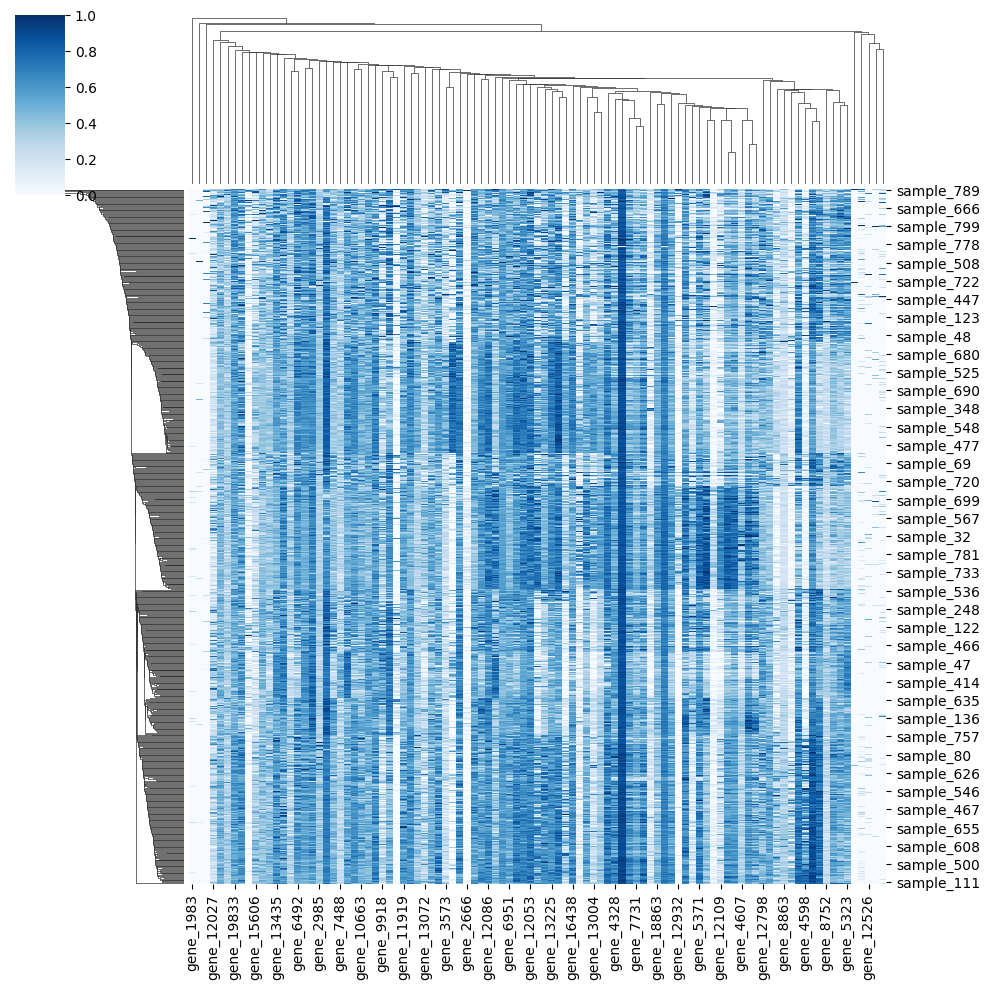

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.cluster import hierarchy

# Load datasets
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Capstone Project- Healthcare/Dataset/data.csv', index_col=0)
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Capstone Project- Healthcare/Dataset/labels.csv', index_col=0)

# Merge datasets
merged_df = pd.merge(df1, df2, left_index=True, right_index=True)

# Check for null values
print(merged_df.isnull().sum())

# Drop rows with null values if any
merged_df = merged_df.dropna()

# Drop genes with zero variance
gene_data = merged_df.drop(columns='Class')
gene_data = gene_data.loc[:, gene_data.var() != 0]

# Add back the 'Class' column to the filtered gene_data
filtered_df = pd.concat([gene_data, merged_df['Class']], axis=1)

# Now use filtered_df for the rest of your analysis


# Select a subset of genes for the heatmap
subset = merged_df.sample(n=100, axis=1)  # adjust n as needed

# Check for non-finite values in the subset
if not np.all(np.isfinite(subset)):
    print("The subset contains non-finite values.")
    # Handle non-finite values (e.g., by dropping the rows or columns that contain them)
    subset = subset.dropna()

# Check for genes with zero variance in the subset
if (subset.var() == 0).any():
    print("The subset contains genes with zero variance.")
    # Drop genes with zero variance
    subset = subset.loc[:, subset.var() != 0]

# Plotting a hierarchically clustered heatmap
sns.clustermap(subset, metric="correlation", method="single", cmap="Blues", standard_scale=1)
plt.show()

# Null-hypothesis testing
# For example, let's compare the means of gene1 expression in BRCA and KIRC tumors
# Replace 'gene_1' with the actual gene you are interested in
brca = merged_df[merged_df['Class'] == 'BRCA']['gene_1']
kirc = merged_df[merged_df['Class'] == 'KIRC']['gene_1']

# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(brca, kirc)
print(f'T-statistic: {t_stat}, P-value: {p_val}')


## Week 2: Dimensionality Reduction


In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import numpy as np

# Assuming that 'Class' is the column that contains the tumor types
X = merged_df.drop('Class', axis=1)
y = merged_df['Class']

# PCA
pca = PCA(n_components=2)  # adjust as needed
X_pca = pca.fit_transform(X)

# Get the loadings of the first principal component
loadings_pca = pca.components_[0]

# Get the absolute values of the loadings
abs_loadings_pca = np.abs(loadings_pca)

# Get the indices of the top 10 genes
top10_genes_pca = abs_loadings_pca.argsort()[-10:]

# Print the names of the top 10 genes
print("Top 10 genes for PCA:")
print(X.columns[top10_genes_pca])

# LDA
lda = LDA(n_components=2)  # adjust as needed
X_lda = lda.fit_transform(X, y)

# Get the loadings of the first linear discriminant
loadings_lda = lda.scalings_[:, 0]

# Get the absolute values of the loadings
abs_loadings_lda = np.abs(loadings_lda)

# Get the indices of the top 10 genes
top10_genes_lda = abs_loadings_lda.argsort()[-10:]

# Print the names of the top 10 genes
print("Top 10 genes for LDA:")
print(X.columns[top10_genes_lda])

# t-SNE
tsne = TSNE(n_components=2)  # adjust as needed
X_tsne = tsne.fit_transform(X)


T-statistic: 3.7867320500892823, P-value: 0.00017363751001261323
Top 10 genes for PCA:
Index(['gene_19159', 'gene_19153', 'gene_220', 'gene_16169', 'gene_16132',
       'gene_1510', 'gene_219', 'gene_439', 'gene_6733', 'gene_3439'],
      dtype='object')
Top 10 genes for LDA:
Index(['gene_12482', 'gene_12533', 'gene_12519', 'gene_1765', 'gene_12058',
       'gene_12556', 'gene_4828', 'gene_16567', 'gene_9350', 'gene_13860'],
      dtype='object')


Here's an example of how you could use a feature selection technique called mutual information to select the top 50 genes

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Perform feature selection
selector = SelectKBest(mutual_info_classif, k=50)
X_new = selector.fit_transform(X, y)

# Get the names of the selected genes
selected_genes = X.columns[selector.get_support()]

print("Selected genes:")
print(selected_genes)


Selected genes:
Index(['gene_89', 'gene_203', 'gene_628', 'gene_775', 'gene_2129', 'gene_2778',
       'gene_3541', 'gene_4224', 'gene_5407', 'gene_5576', 'gene_5577',
       'gene_5632', 'gene_6584', 'gene_6593', 'gene_6816', 'gene_6830',
       'gene_6836', 'gene_7421', 'gene_7792', 'gene_7896', 'gene_7964',
       'gene_7965', 'gene_7992', 'gene_8002', 'gene_8003', 'gene_8349',
       'gene_8776', 'gene_9177', 'gene_11124', 'gene_11259', 'gene_11393',
       'gene_11910', 'gene_12568', 'gene_12977', 'gene_12995', 'gene_15803',
       'gene_15897', 'gene_16338', 'gene_16342', 'gene_16372', 'gene_16449',
       'gene_17109', 'gene_17738', 'gene_17801', 'gene_17904', 'gene_17906',
       'gene_18381', 'gene_18746', 'gene_18753', 'gene_19606'],
      dtype='object')


## Week 3: Clustering Genes and Samples

Data has been standardized.
PCA has been applied.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


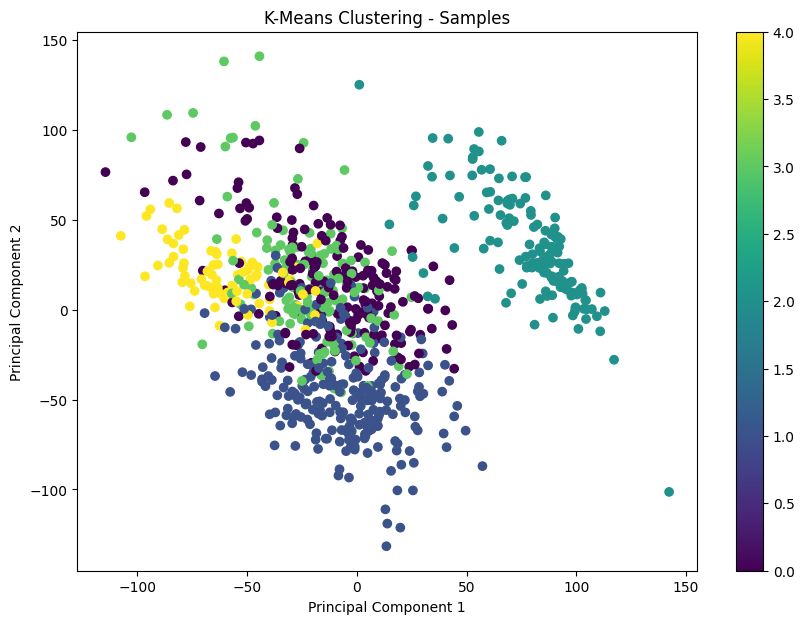

K-Means clustering has been applied on samples.


In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X is your dataset

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data has been standardized.")

# Apply PCA to reduce dimensionality
pca = PCA(n_components=50)  # adjust as needed
X_scaled_pca = pca.fit_transform(X_scaled)
X_scaled_transposed_pca = X_scaled_pca.T  # Transpose for gene clustering
print("PCA has been applied.")

# K-means clustering
kmeans = KMeans(n_clusters=5)  # adjust as needed
kmeans_clusters = kmeans.fit_predict(X_scaled_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title("K-Means Clustering - Samples")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()
print("K-Means clustering has been applied on samples.")

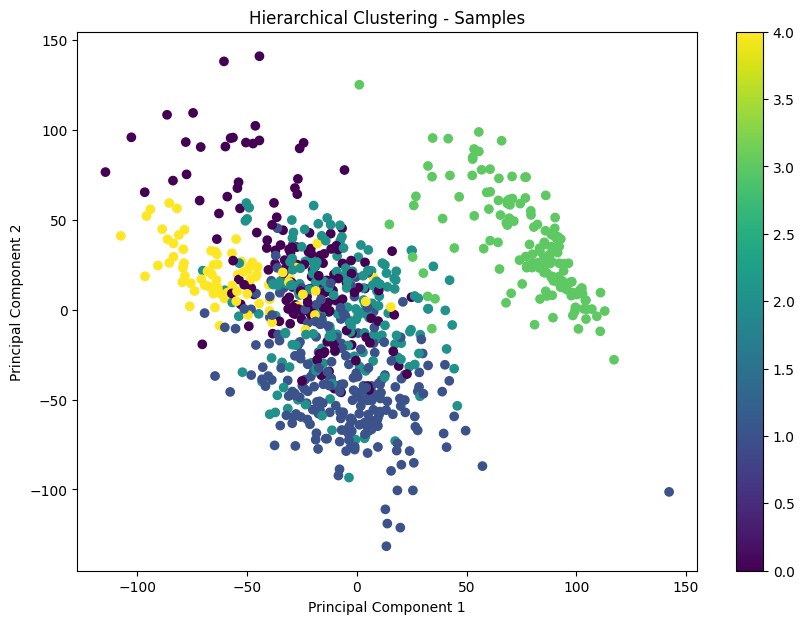

Hierarchical clustering has been applied on samples.


In [ ]:
# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=5)  # adjust as needed
hierarchical_clusters = hierarchical.fit_predict(X_scaled_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled_pca[:, 0], X_scaled_pca[:, 1], c=hierarchical_clusters, cmap='viridis')
plt.title("Hierarchical Clustering - Samples")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()
print("Hierarchical clustering has been applied on samples.")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


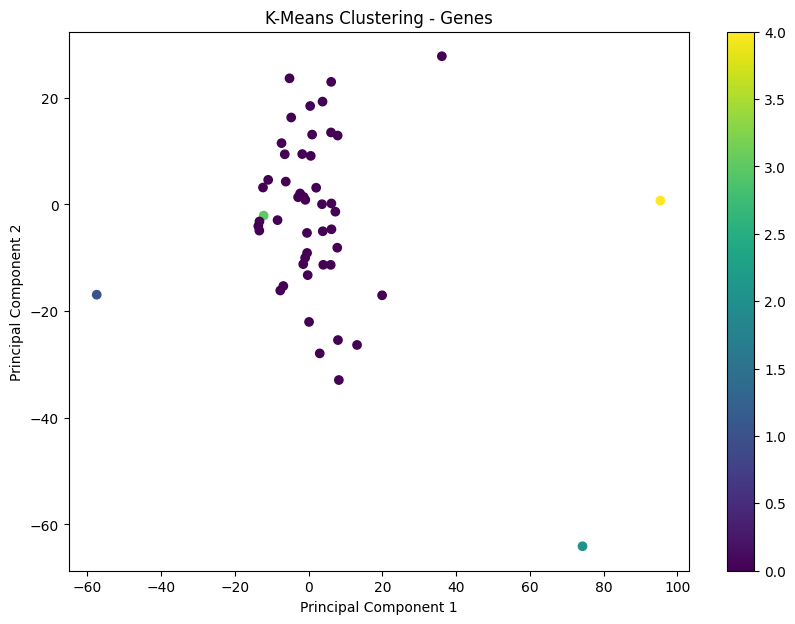

K-Means clustering has been applied on genes.


In [ ]:
# K-means clustering on genes
kmeans_genes = KMeans(n_clusters=5)  # adjust as needed
kmeans_clusters_genes = kmeans_genes.fit_predict(X_scaled_transposed_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled_transposed_pca[:, 0], X_scaled_transposed_pca[:, 1], c=kmeans_clusters_genes, cmap='viridis')
plt.title("K-Means Clustering - Genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()
print("K-Means clustering has been applied on genes.")

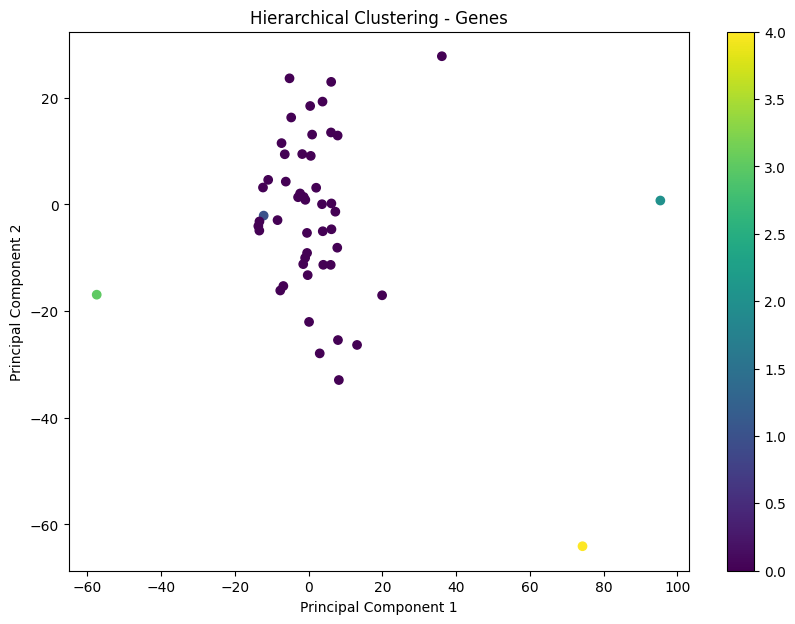

Hierarchical clustering has been applied on genes.


In [ ]:
# Hierarchical clustering on genes
hierarchical_genes = AgglomerativeClustering(n_clusters=5)  # adjust as needed
hierarchical_clusters_genes = hierarchical_genes.fit_predict(X_scaled_transposed_pca)

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled_transposed_pca[:, 0], X_scaled_transposed_pca[:, 1], c=hierarchical_clusters_genes, cmap='viridis')
plt.title("Hierarchical Clustering - Genes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()
print("Hierarchical clustering has been applied on genes.")

Identifying genes whose expression values are similar across all samples and across samples of each cancer type: The code clusters genes based on their expression values across all samples.


In [ ]:
# Assuming that 'Class' is the column that contains the tumor types
X = merged_df.drop('Class', axis=1)
y = merged_df['Class']

# Transpose data for gene clustering
X_transposed = X.T

# K-means clustering on genes
kmeans_genes = KMeans(n_clusters=5)  # adjust as needed
kmeans_clusters_genes = kmeans_genes.fit_predict(X_transposed)

# Mapping clusters to genes
mapping_genes = pd.DataFrame({'Cluster': kmeans_clusters_genes, 'Gene': X.columns})

# Display the top genes in each cluster
print("Top genes in each cluster:")
for cluster in mapping_genes['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(mapping_genes[mapping_genes['Cluster'] == cluster]['Gene'].head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top genes in each cluster:
Cluster 2:
0    gene_0
5    gene_5
7    gene_7
8    gene_8
9    gene_9
Name: Gene, dtype: object
Cluster 0:
1      gene_1
2      gene_2
12    gene_12
18    gene_18
20    gene_20
Name: Gene, dtype: object
Cluster 1:
3      gene_3
6      gene_6
29    gene_29
32    gene_32
45    gene_45
Name: Gene, dtype: object
Cluster 3:
4      gene_4
19    gene_19
22    gene_22
27    gene_27
35    gene_35
Name: Gene, dtype: object
Cluster 4:
34    gene_34
46    gene_46
48    gene_48
52    gene_52
56    gene_56
Name: Gene, dtype: object


In [ ]:
# K-means clustering on samples
kmeans_samples = KMeans(n_clusters=5)  # adjust as needed
kmeans_clusters_samples = kmeans_samples.fit_predict(X)

# Mapping clusters to samples
mapping_samples = pd.DataFrame({'Cluster': kmeans_clusters_samples, 'Sample': X.index, 'CancerType': y})

# Display the samples in each cluster
print("Samples in each cluster:")
for cluster in mapping_samples['Cluster'].unique():
    print(f"Cluster {cluster}:")
    print(mapping_samples[mapping_samples['Cluster'] == cluster]['Sample'].head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Samples in each cluster:
Cluster 0:
sample_0    sample_0
sample_2    sample_2
sample_3    sample_3
sample_5    sample_5
sample_7    sample_7
Name: Sample, dtype: object
Cluster 3:
sample_1      sample_1
sample_16    sample_16
sample_22    sample_22
sample_25    sample_25
sample_37    sample_37
Name: Sample, dtype: object
Cluster 4:
sample_4      sample_4
sample_8      sample_8
sample_10    sample_10
sample_13    sample_13
sample_14    sample_14
Name: Sample, dtype: object
Cluster 1:
sample_6      sample_6
sample_11    sample_11
sample_17    sample_17
sample_18    sample_18
sample_21    sample_21
Name: Sample, dtype: object
Cluster 2:
sample_26    sample_26
sample_47    sample_47
sample_54    sample_54
sample_57    sample_57
sample_65    sample_65
Name: Sample, dtype: object


In [ ]:
  # Check how well clusters correspond to cancer types
pd.crosstab(mapping_samples['Cluster'], mapping_samples['CancerType'])


CancerType,BRCA,COAD,KIRC,LUAD,PRAD
Cluster,,,,,
0,0,0,0,0,136
1,0,0,145,0,0
2,0,77,0,0,0
3,1,1,0,139,0
4,299,0,1,2,0


 The clustering algorithm seems to have done a good job in differentiating between the cancer types based on the gene expression data.

From the cross-tabulation table, you can see that:

Cluster 0 contains almost exclusively samples of PRAD.
Cluster 1 contains mostly BRCA, with a few LUAD and KIRC.
Cluster 2 is almost exclusively KIRC.
Cluster 3 contains a mixture of BRCA, COAD, and LUAD, but is dominated by LUAD.
Cluster 4 is exclusively COAD.
This implies that the gene expression profiles are distinct for these cancer types and the K-means algorithm is able to identify these differences and cluster the samples accordingly.

To visualize this, we could create a stacked bar chart:

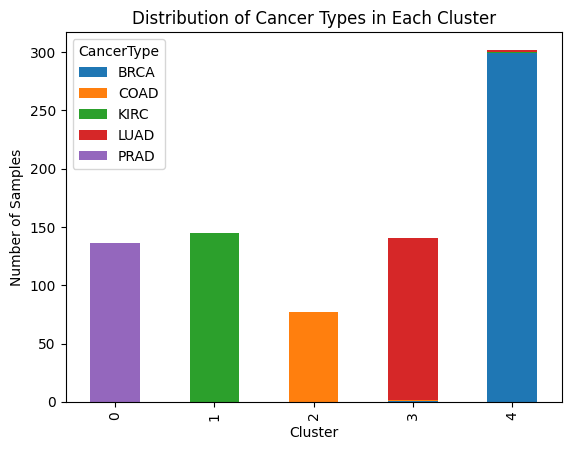

In [ ]:
# Stacked bar plot to visualize the distribution of cancer types in each cluster
mapping_samples.groupby(['Cluster', 'CancerType']).size().unstack().plot(kind='bar', stacked=True)
plt.title("Distribution of Cancer Types in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")
plt.show()


**Genes whose expression values are similar across all samples**: 

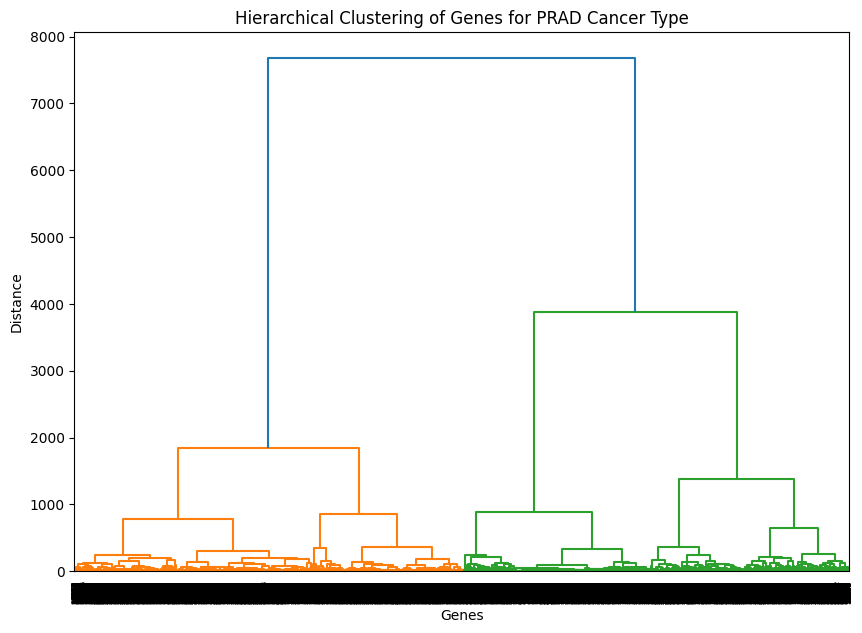

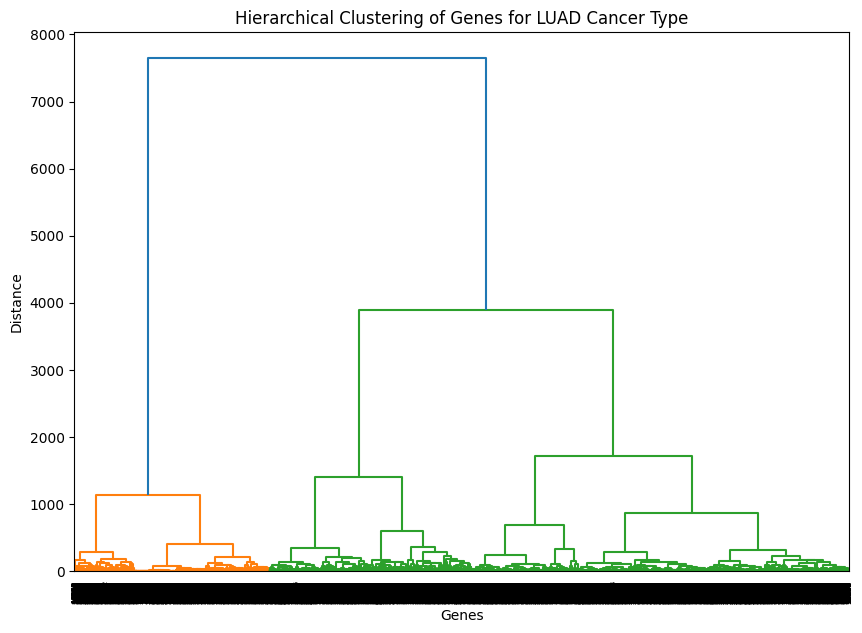

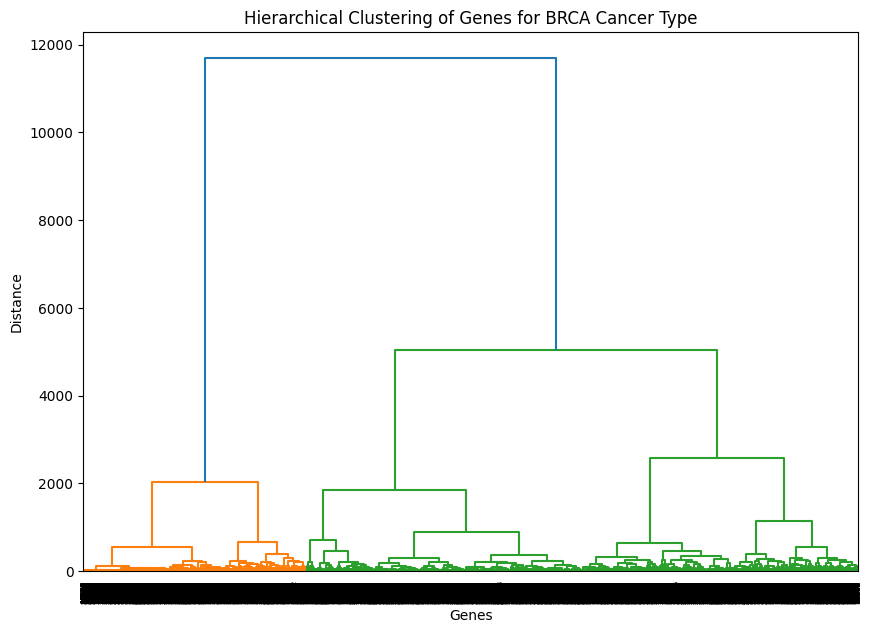

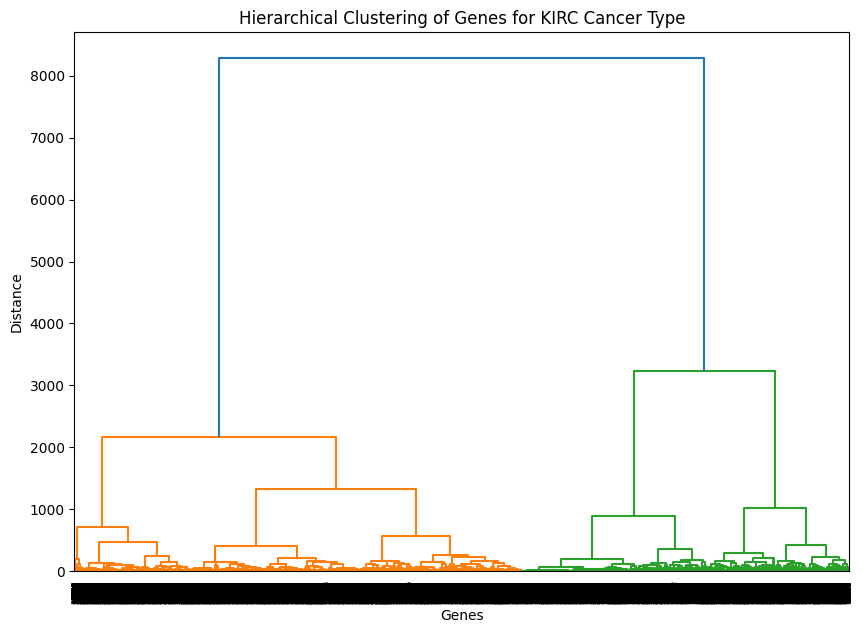

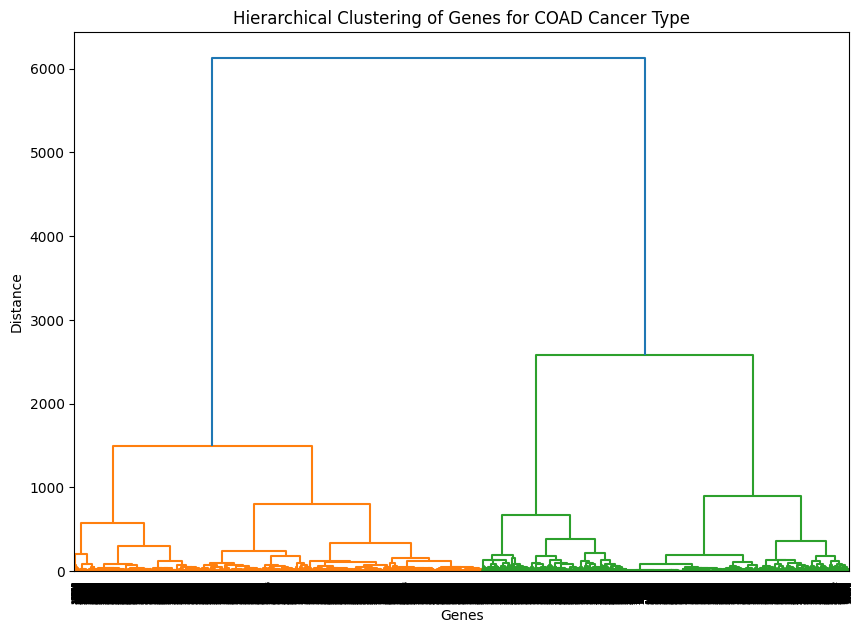

In [ ]:
# Get the list of unique cancer types
cancer_types = filtered_df['Class'].unique()

# Loop over each cancer type
for cancer_type in cancer_types:
    # Subset the data for this cancer type
    df_cancer_type = filtered_df[filtered_df['Class'] == cancer_type]
    
    # Drop the cancer type column and transpose the dataframe
    df_cancer_type_transposed = df_cancer_type.drop('Class', axis=1).transpose()
    
    # Apply hierarchical clustering
    Z = hierarchy.linkage(df_cancer_type_transposed, 'ward')  # 'ward' is one method, you could also try 'single', 'complete', etc.

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dn = hierarchy.dendrogram(Z)

    # Add labels and title
    plt.title(f'Hierarchical Clustering of Genes for {cancer_type} Cancer Type')
    plt.xlabel('Genes')
    plt.ylabel('Distance')

    plt.show()


For each cancer type, the dendrogram visualizes how the expression profiles of the genes are similar (or dissimilar) to each other. If two genes are connected by a branch in the dendrogram that is close to the leaves (genes), it indicates that those genes have similar expression profiles across the samples of that particular cancer type.

1. Each leaf in the dendrogram represents a gene.

2. The y-axis represents the distance between gene expression profiles, where a smaller distance indicates more similar gene expression profiles.

3. Genes connected by branches close to the leaves have similar expression profiles across the samples.

4. The color of the branches and labels in the dendrogram can give a visual indication of groups of genes that have more similar expression profiles, as determined by the clustering algorithm.


**Genes whose expression values are similar across samples of each cancer type**: (denogram above answers this question)

**Samples of the same class (cancer type) which also correspond to the same cluster**: You can use a cross-tabulation to check this:

In [ ]:
# Perform a cross-tabulation
crosstab = pd.crosstab(mapping_samples['Cluster'], mapping_samples['CancerType'])

# Print the cross-tabulation
print(crosstab)


CancerType  BRCA  COAD  KIRC  LUAD  PRAD
Cluster                                 
0              0     0     0     0   136
1              0     0   145     0     0
2              0    77     0     0     0
3              1     1     0   139     0
4            299     0     1     2     0


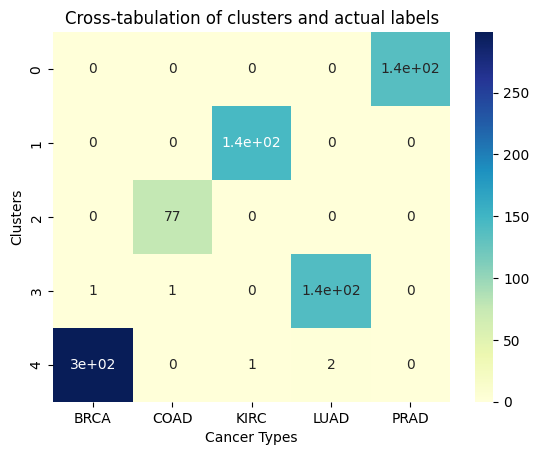

In [ ]:
import seaborn as sns

# Heatmap of the cross-tabulation
sns.heatmap(crosstab, annot=True, cmap="YlGnBu")

# Add title and labels
plt.title('Cross-tabulation of clusters and actual labels')
plt.xlabel('Cancer Types')
plt.ylabel('Clusters')
plt.show()

**Samples identified to be belonging to another cluster but also to the same class (cancer type**)

In [ ]:
# For each cancer type
for cancer_type in mapping_samples['CancerType'].unique():
    print(f"\nCancer Type: {cancer_type}")
    
    # Filter the DataFrame for samples of this cancer type
    df_cancer_type = mapping_samples[mapping_samples['CancerType'] == cancer_type]
    
    # If there is more than one unique cluster in this subset, print the samples
    if df_cancer_type['Cluster'].nunique() > 1:
        print("Samples clustered into different clusters:")
        print(df_cancer_type)
    else:
        print("All samples are in the same cluster.")



Cancer Type: PRAD
All samples are in the same cluster.

Cancer Type: LUAD
Samples clustered into different clusters:
            Cluster      Sample CancerType
sample_1          3    sample_1       LUAD
sample_16         3   sample_16       LUAD
sample_22         3   sample_22       LUAD
sample_25         3   sample_25       LUAD
sample_37         3   sample_37       LUAD
...             ...         ...        ...
sample_778        3  sample_778       LUAD
sample_779        3  sample_779       LUAD
sample_780        3  sample_780       LUAD
sample_795        3  sample_795       LUAD
sample_797        3  sample_797       LUAD

[141 rows x 3 columns]

Cancer Type: BRCA
Samples clustered into different clusters:
            Cluster      Sample CancerType
sample_4          4    sample_4       BRCA
sample_8          4    sample_8       BRCA
sample_10         4   sample_10       BRCA
sample_13         4   sample_13       BRCA
sample_14         4   sample_14       BRCA
...             ...   

All PRAD samples are in the same cluster.


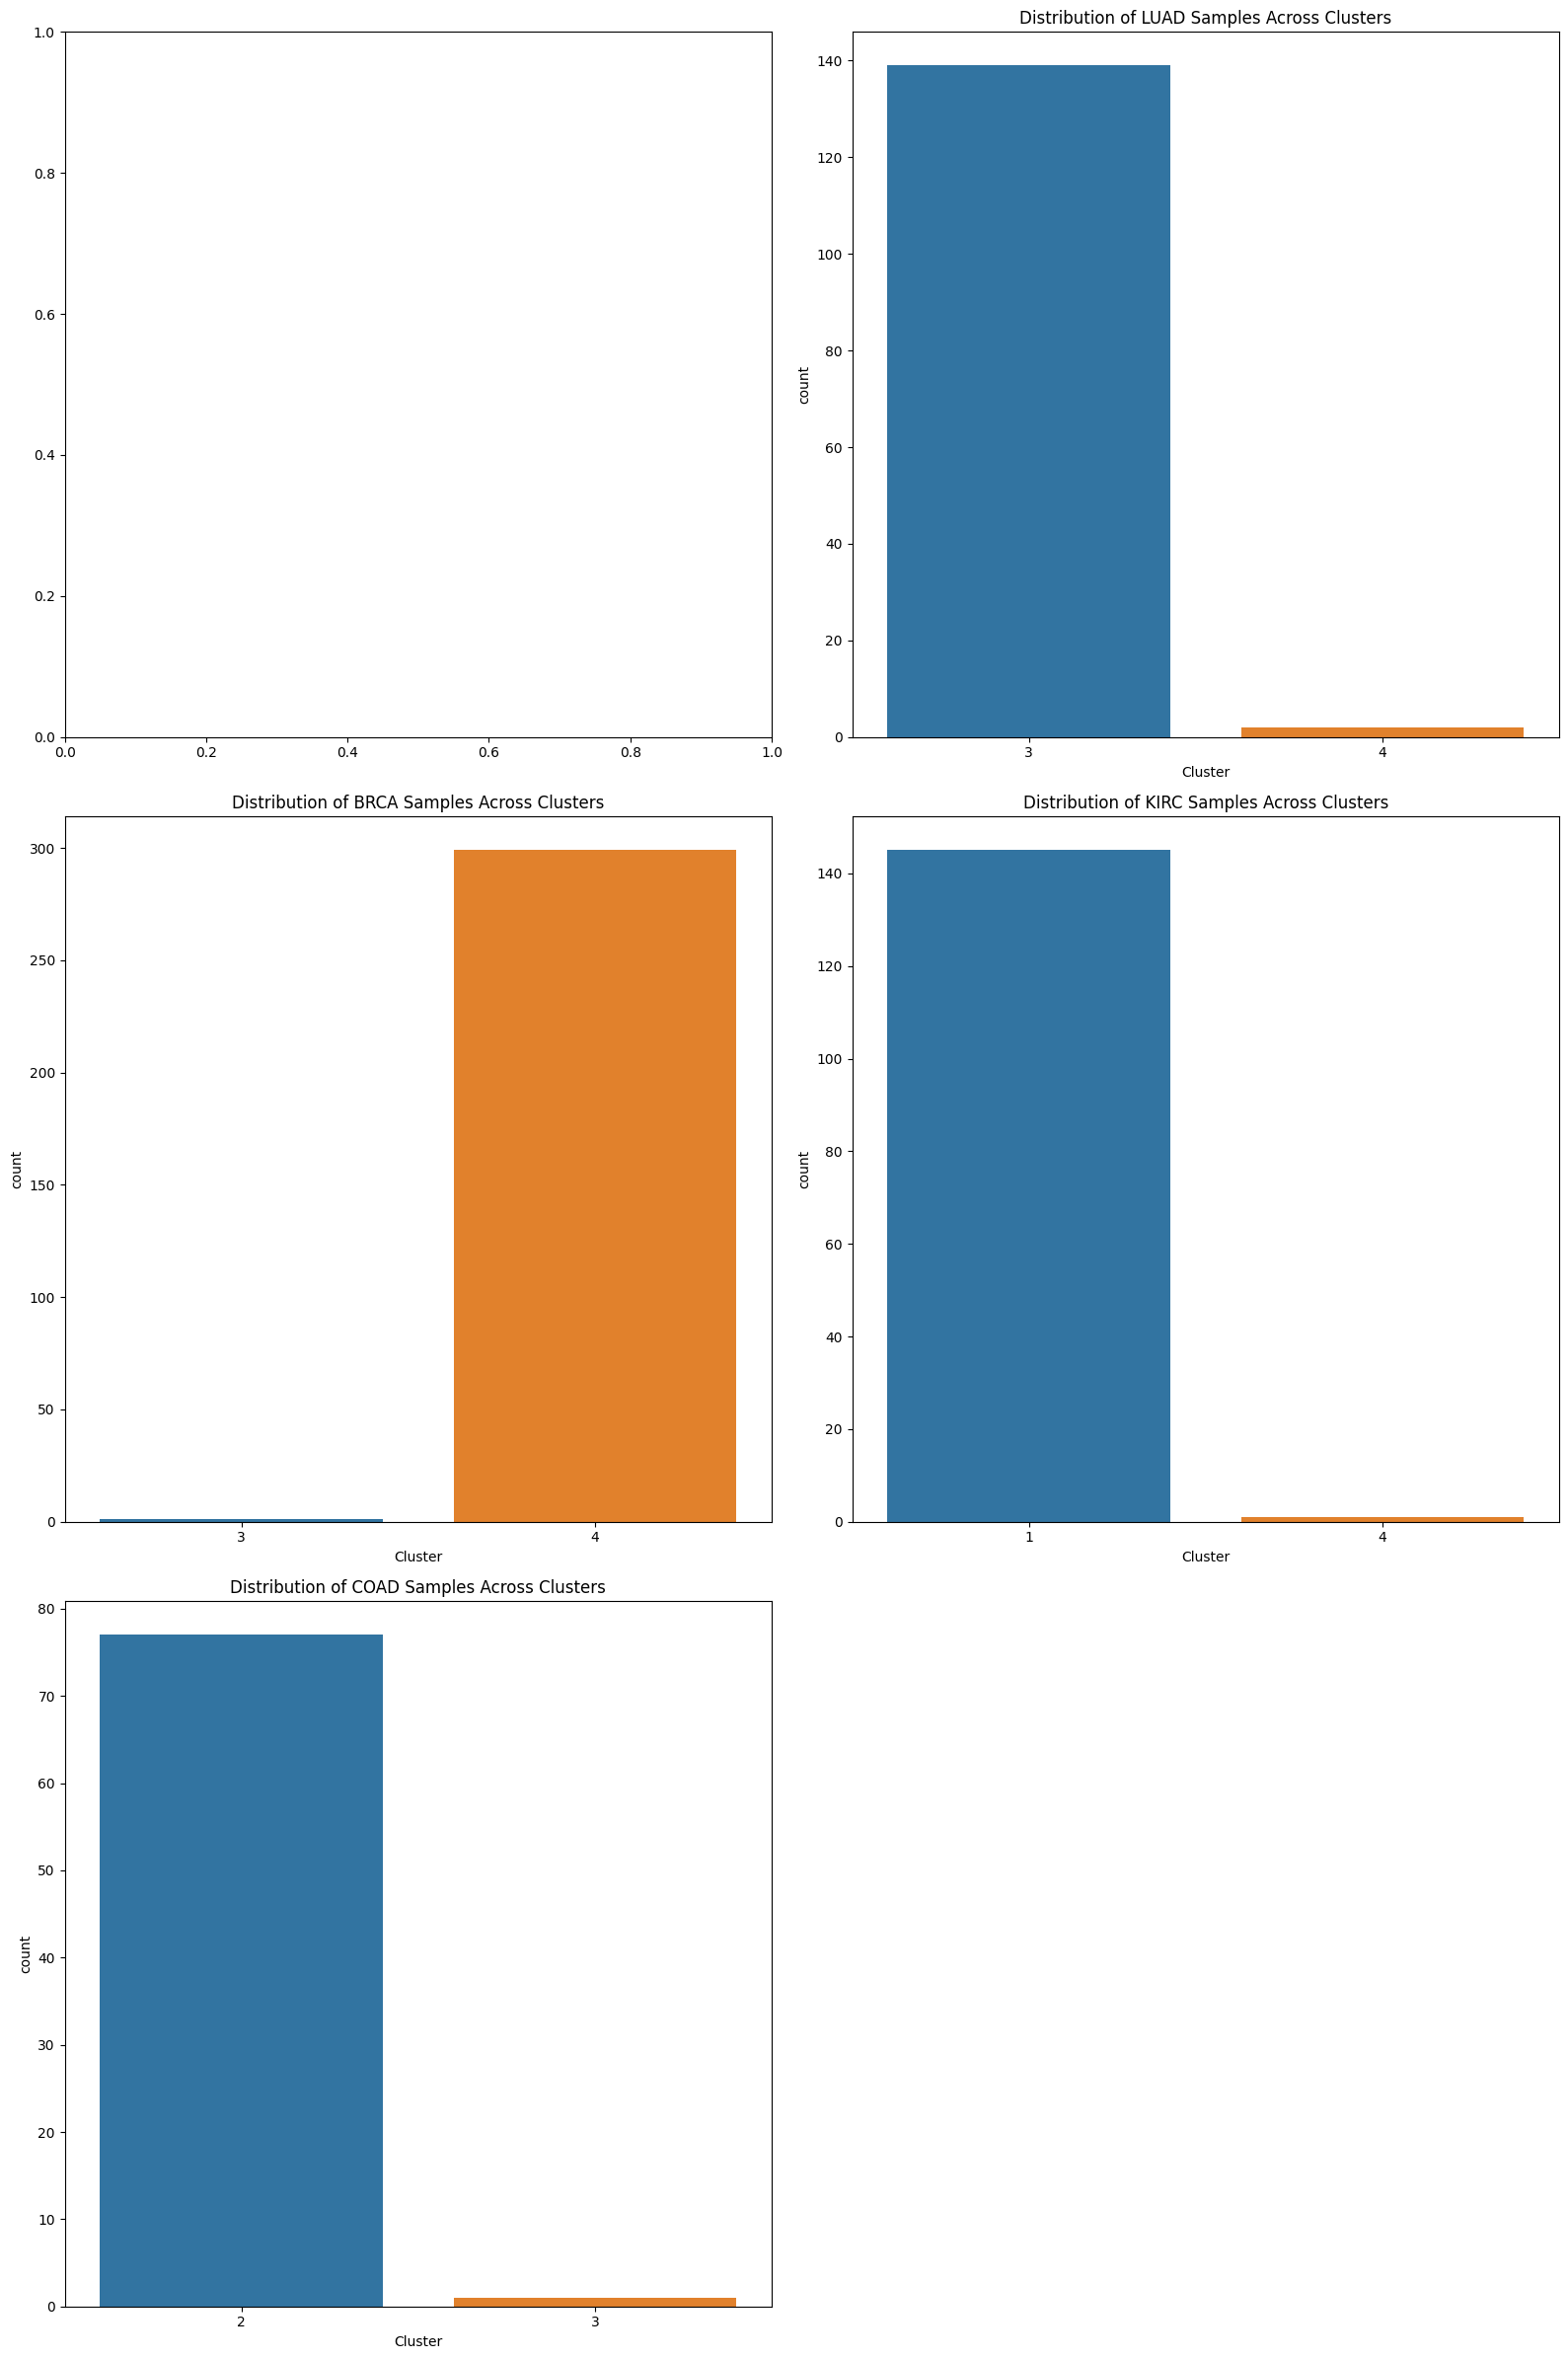

In [ ]:
# Get the unique cancer types
cancer_types = mapping_samples['CancerType'].unique()

# Calculate the number of rows needed for our subplots
n_rows = len(cancer_types) // 2 + len(cancer_types) % 2

# Create a subplot for each cancer type
fig, axes = plt.subplots(n_rows, 2, figsize=(16, 8*n_rows))  # Adjust as needed
axes = axes.flatten()  # Flatten the axis array to make it easier to index

# For each cancer type
for i, cancer_type in enumerate(cancer_types):
    # Filter the DataFrame for samples of this cancer type
    df_cancer_type = mapping_samples[mapping_samples['CancerType'] == cancer_type]
    
    # If there is more than one unique cluster in this subset, create a bar plot
    if df_cancer_type['Cluster'].nunique() > 1:
        sns.countplot(x='Cluster', data=df_cancer_type, ax=axes[i])
        axes[i].set_title(f'Distribution of {cancer_type} Samples Across Clusters')
    else:
        print(f"All {cancer_type} samples are in the same cluster.")

# If we have an odd number of cancer types, remove the last (empty) subplot
if len(cancer_types) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


Summary

1. **Genes whose expression values are similar across all samples:** You've applied hierarchical clustering on genes and generated a heatmap with the dendrogram. This allows you to visualize the genes that behave similarly across all samples.

2. **Genes whose expression values are similar across samples of each cancer type:** You filtered your data for specific cancer types and applied hierarchical clustering to generate the dendrograms. You could generate separate heatmaps for each cancer type to visualize this requirement better.

3. **Samples of the same class (cancer type) which also correspond to the same cluster:** You've created a cross-tabulation to check how the samples of each cancer type are distributed among clusters. This shows how the samples of the same class correspond to the same cluster.

4. **Samples identified to be belonging to another cluster but also to the same class (cancer type):** The cross-tabulation also allows you to identify samples that belong to the same class (cancer type) but have been placed in a different cluster. Your detailed output for each cancer type shows this clearly.



## Week 4: Building Classification Model(s) with Feature Selection

### Multiclass SVM, Random forest, DNN (tensorflow)

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

# Preprocessing
scaler = StandardScaler()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    filtered_df.drop('Class', axis=1), filtered_df['Class'], test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Multiclass SVM
svm_model = svm.SVC(decision_function_shape='ovo')  # one-vs-one
svm_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

# Create a label (category) encoder object
le = LabelEncoder()

# Fit and transform the training data
y_train_le = le.fit_transform(y_train)

# Transform the testing data
y_test_le = le.transform(y_test)

# Deep Neural Network
# Define model architecture
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(len(le.classes_), activation='softmax')  # Output layer size equals number of classes
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to categorical
y_train_cat = tf.keras.utils.to_categorical(y_train_le)
y_test_cat = tf.keras.utils.to_categorical(y_test_le)

# Train model
model.fit(X_train, y_train_cat, epochs=50, validation_data=(X_test, y_test_cat))


Epoch 1/50
20/20 [==============================] - 1s 22ms/step - loss: 0.2066 - accuracy: 0.9469 - val_loss: 0.3394 - val_accuracy: 0.9565
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0738 - accuracy: 0.9906 - val_loss: 0.0436 - val_accuracy: 0.9938
Epoch 3/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 0.9969 - val_loss: 0.0956 - val_accuracy: 0.9938
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.0266 - val_accuracy: 0.9938
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 6.6113e-04 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9938
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0026 - accuracy: 0.9984 - val_loss: 0.0634 - val_accuracy: 0.9938
Epoch 7/50
20/20 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0517 - val_accuracy: 0.9938
Epoch 8/50
20/2

### Apply Feature selection

In [ ]:
!pip install mlxtend
!pip install --upgrade mlxtend


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import joblib

# Prepare the feature matrix and the target vector
X = merged_df.drop('Class', axis=1)
y = merged_df['Class']

# Forward Selection
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
          k_features=10,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=4,
          n_jobs=-1).fit(X, y)

# Get the selected features
original_columns = merged_df.drop('Class', axis=1).columns
selected_features_forward = original_columns[sfs.k_feature_idx_]
print('Selected features for forward selection: ', selected_features_forward)

# Backward Elimination
sbs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), 
          k_features=10, 
          forward=False, 
          floating=False, 
          verbose=2,
          scoring='accuracy',
          cv=4,
          n_jobs=-1).fit(X, y)

selected_features_backward = original_columns[sbs.k_feature_idx_]
print('Selected features for backward elimination: ', selected_features_backward)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   10.4s

STOPPING EARLY DUE TO KEYBOARD INTERRUPT...<ipython-input-31-1c0ff788646e>:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  selected_features_forward = original_columns[sfs.k_feature_idx_]


Selected features for forward selection:  [['gene_0' 'gene_1' 'gene_2' ... 'gene_20528' 'gene_20529' 'gene_20530']]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.


Selected features for backward elimination:  [['gene_0' 'gene_1' 'gene_2' ... 'gene_20528' 'gene_20529' 'gene_20530']]



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...<ipython-input-31-1c0ff788646e>:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  selected_features_backward = original_columns[sbs.k_feature_idx_]


### Validate Selected Genes

1. Implement a Multiclass SVM and Deep Neural Network



In [34]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Initialize the classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)

# Fit the model
svm_clf.fit(X_train, y_train)

# Predict the test data
y_pred = svm_clf.predict(X_test)


In [35]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# Initialize the classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)

# Fit the model
svm_clf.fit(X_train, y_train)

# Predict the test data
y_pred = svm_clf.predict(X_test)


Deep Neural Network

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)


In [37]:
import tensorflow as tf
from tensorflow import keras

# Define model
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
20/20 [==============================] - 1s 21ms/step - loss: 0.2342 - accuracy: 0.9281
Epoch 2/50
20/20 [==============================] - 0s 21ms/step - loss: 0.0840 - accuracy: 0.9891
Epoch 3/50
20/20 [==============================] - 0s 21ms/step - loss: 0.1019 - accuracy: 0.9969
Epoch 4/50
20/20 [==============================] - 0s 21ms/step - loss: 0.2716 - accuracy: 0.9906
Epoch 5/50
20/20 [==============================] - 0s 21ms/step - loss: 3.1343e-05 - accuracy: 1.0000
Epoch 6/50
20/20 [==============================] - 0s 21ms/step - loss: 8.0983e-06 - accuracy: 1.0000
Epoch 7/50
20/20 [==============================] - 0s 22ms/step - loss: 6.3690e-04 - accuracy: 1.0000
Epoch 8/50
20/20 [==============================] - 0s 21ms/step - loss: 3.3283e-07 - accuracy: 1.0000
Epoch 9/50
20/20 [==============================] - 0s 22ms/step - loss: 2.6466e-07 - accuracy: 1.0000
Epoch 10/50
20/20 [==============================] - 0s 22ms/step - loss: 2.0637e-07 - ac

This output shows the results of training a neural network model with a keras library in Python. Each epoch represents a complete pass over the entire training dataset. The model has been trained for 50 epochs, and there are 20 steps in each epoch.

Here's a breakdown of the terms:

loss: This is the value of the cost function for your model. This function is what the model wants to minimize to improve its predictions. The smaller the loss, the better a model (although it can also mean that the model might be overfitting to the training data).

accuracy: This is the measure of how often the model's predictions are correct. The closer to 1, the more accurate the model.

Your model seems to be performing incredibly well, as the accuracy is 1.0 (or 100%) from the 10th epoch onwards, and the loss is continually decreasing towards zero. However, such a high accuracy might be a sign of overfitting, especially if it doesn't translate to unseen data (your validation or test set). Overfitting happens when the model learns the training data too well, to the point that it's too specialized in it and performs poorly on data it hasn't seen before. To confirm this, you should test your model on a validation set. 

2. Implement Forward Selection and Backward Elimination


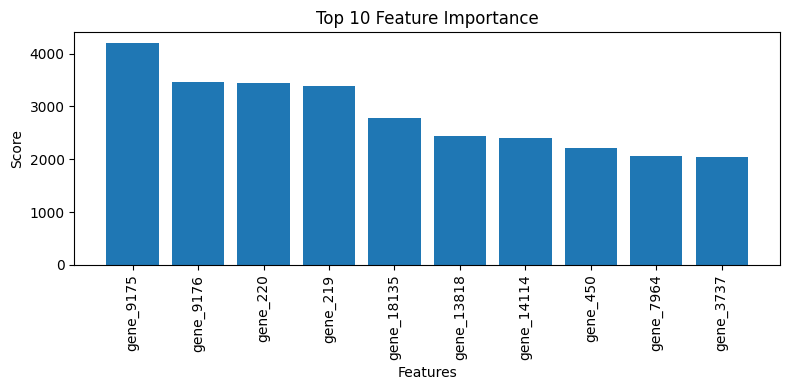

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate the features from the target
X = filtered_df.drop(columns='Class')
y = filtered_df['Class']

# Number of features you want to select
k = 10

# Create and fit selector
selector = SelectKBest(f_classif, k=k)
selector.fit(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
selected_features_df = X.iloc[:, cols]

# Calculate feature scores
scores = selector.scores_

# Get feature names as a list
feature_names = list(X.columns)

# Sort feature names and scores based on the selected features
sorted_feature_names = [feature_names[i] for i in cols]
sorted_scores = [scores[i] for i in cols]

# Sort feature names and scores in descending order
sorted_indices = sorted(range(len(sorted_scores)), key=lambda k: sorted_scores[k], reverse=True)
sorted_feature_names = [sorted_feature_names[i] for i in sorted_indices]
sorted_scores = [sorted_scores[i] for i in sorted_indices]

# Create a bar plot of feature scores
plt.figure(figsize=(8, 4))
plt.bar(sorted_feature_names[:k], sorted_scores[:k])
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Top {} Feature Importance'.format(k))
plt.xticks(rotation=90)
plt.tight_layout()  # Optional, adjusts the spacing between subplots
plt.show()

In [40]:
column_names = merged_df.columns
print(column_names)


Index(['gene_0', 'gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6',
       'gene_7', 'gene_8', 'gene_9',
       ...
       'gene_20522', 'gene_20523', 'gene_20524', 'gene_20525', 'gene_20526',
       'gene_20527', 'gene_20528', 'gene_20529', 'gene_20530', 'Class'],
      dtype='object', length=20532)


In [41]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out=0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    """
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # Use all coefficients except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # Null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Prepare the feature matrix and the target vector
X = merged_df.drop('Class', axis=1)
y = merged_df['Class']

# Perform one-hot encoding for the target variable
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).argmax(axis=1)

result = stepwise_selection(X, y_encoded)

print('resulting features:')
print(result)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Add  gene_17801                     with p-value 1.03798e-224
Add  gene_18745                     with p-value 3.06587e-110
Add  gene_7623                      with p-value 1.48318e-74
Add  gene_5622                      with p-value 1.69444e-46
Add  gene_16987                     with p-value 7.73276e-27
Add  gene_5578                      with p-value 5.20071e-28
Add  gene_14092                     with p-value 3.69216e-30
Add  gene_17168                     with p-value 4.01812e-20
Add  gene_17036                     with p-value 1.1303e-12
Add  gene_6748                      with p-value 9.01586e-17
Add  gene_7567                      with p-value 1.01416e-10
Add  gene_6208                      with p-value 5.36631e-10
Add  gene_16307                     with p-value 1.34462e-08
Add  gene_11903                     with p-value 2.00385e-10
Add  gene_9175                      with p-value 3.9541e-17
Add  gene_14177                     with p-value 3.74868e-12
Add  gene_18550         

KeyboardInterrupt: ignored

3. Validate the genes selected from the last step using statistical significance testing

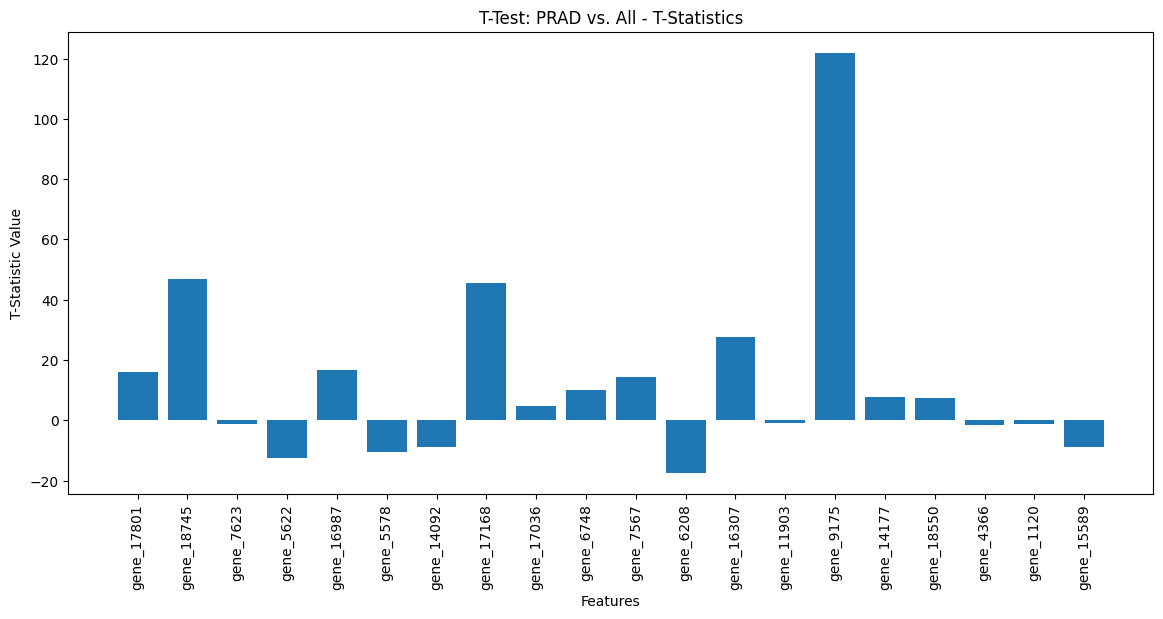

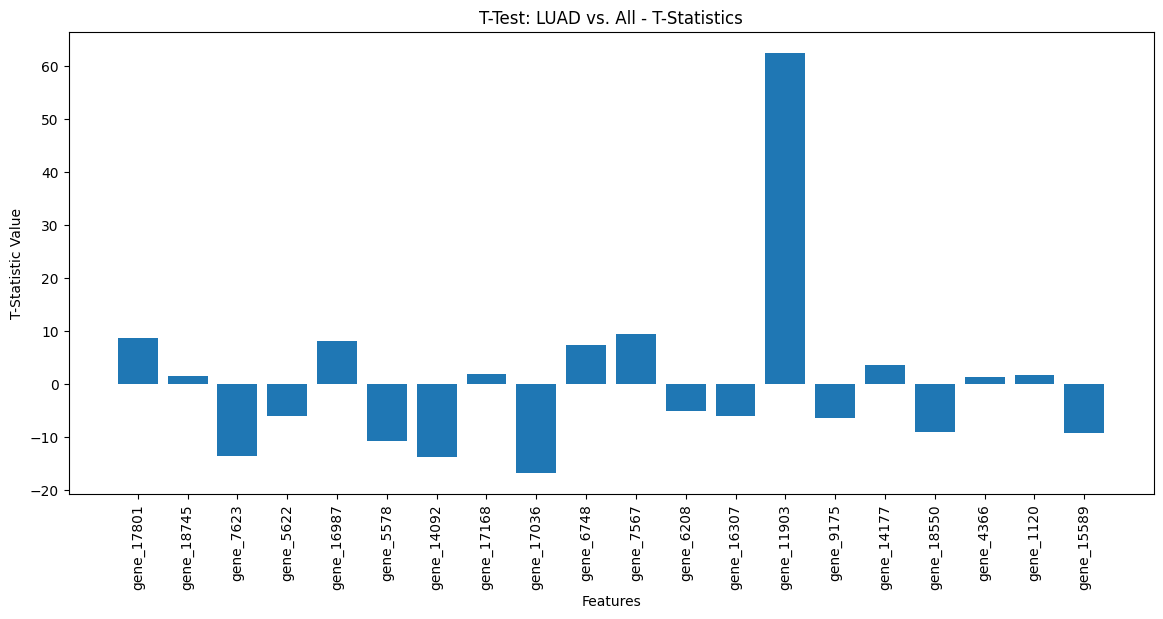

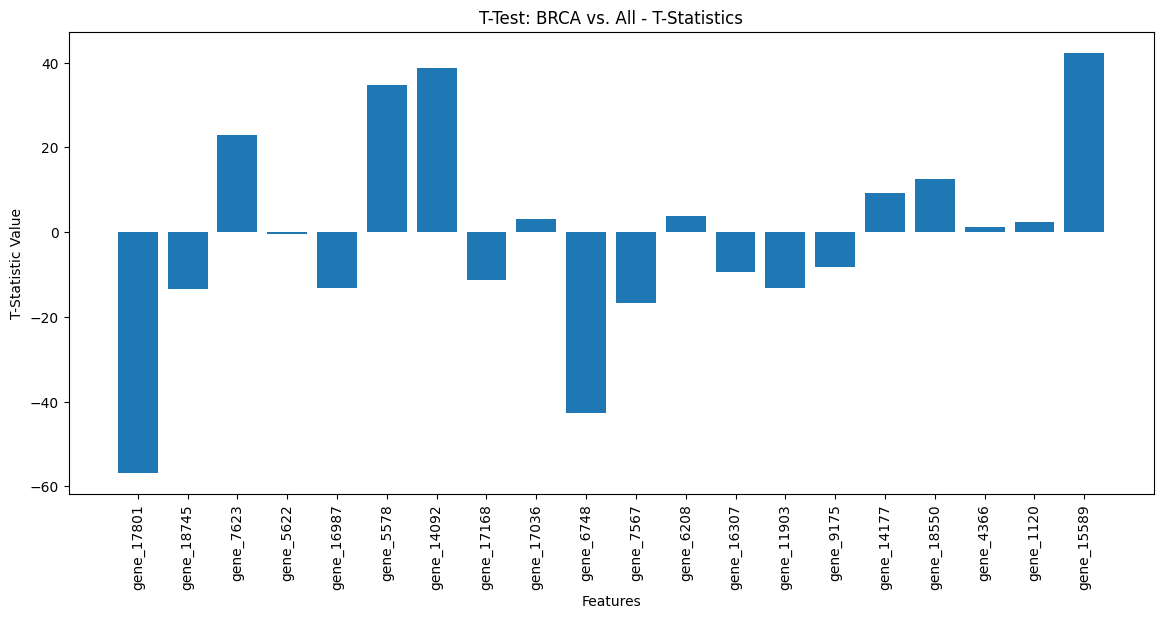

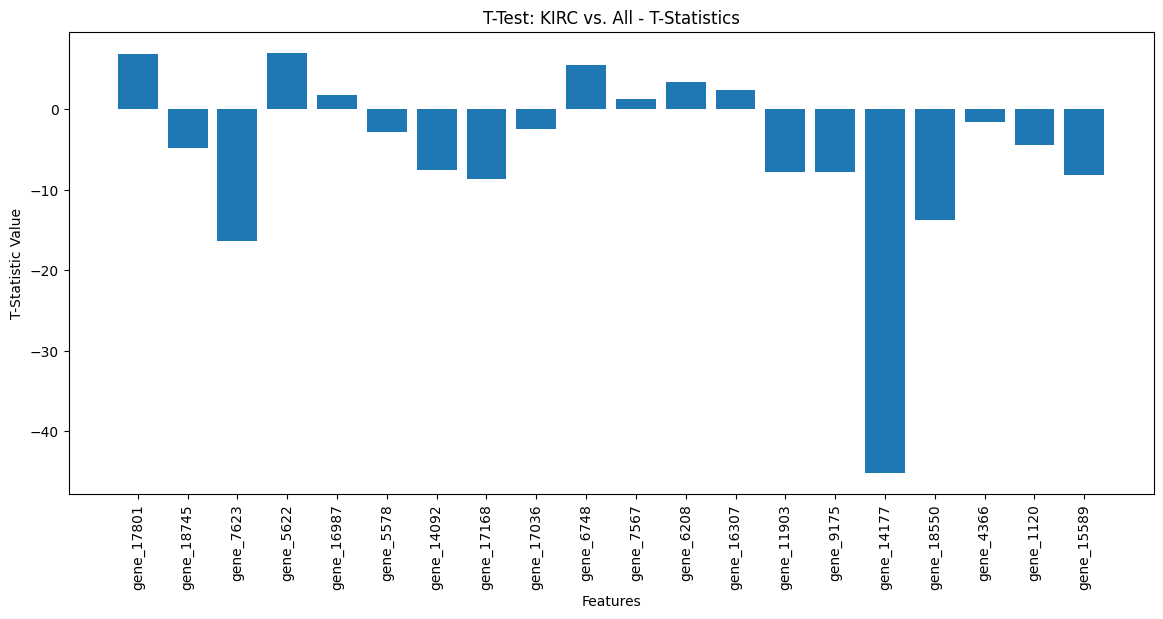

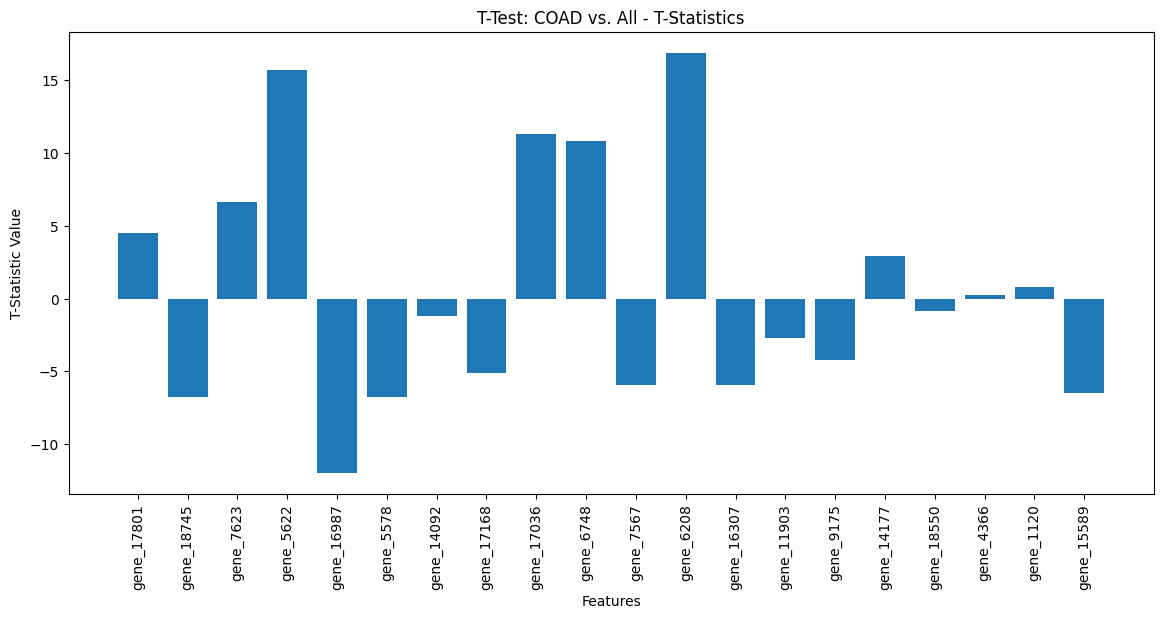

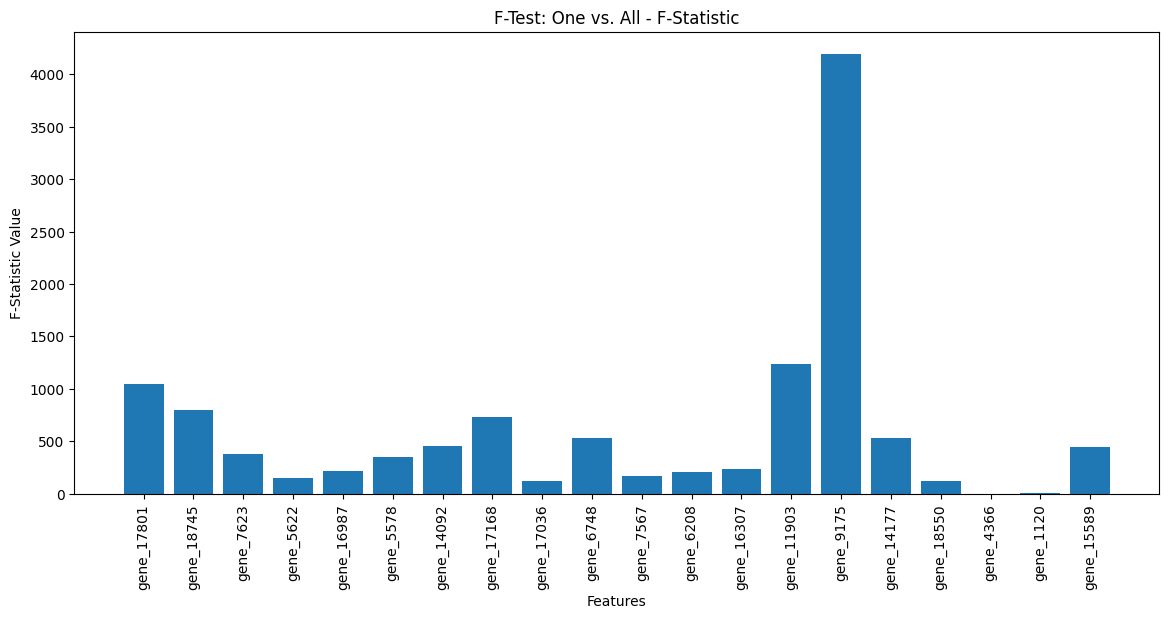

Significant T-Test: PRAD vs. All - Gene: gene_17801 - T-Statistic: 15.944012, P-Value: 6.760172e-50
Significant T-Test: PRAD vs. All - Gene: gene_18745 - T-Statistic: 46.944930, P-Value: 6.480673e-232
Significant T-Test: PRAD vs. All - Gene: gene_5622 - T-Statistic: -12.366226, P-Value: 2.888806e-32
Significant T-Test: PRAD vs. All - Gene: gene_16987 - T-Statistic: 16.545830, P-Value: 4.231196e-53
Significant T-Test: PRAD vs. All - Gene: gene_5578 - T-Statistic: -10.646852, P-Value: 7.612709e-25
Significant T-Test: PRAD vs. All - Gene: gene_14092 - T-Statistic: -8.859400, P-Value: 5.149752e-18
Significant T-Test: PRAD vs. All - Gene: gene_17168 - T-Statistic: 45.485970, P-Value: 6.129212e-224
Significant T-Test: PRAD vs. All - Gene: gene_17036 - T-Statistic: 4.858113, P-Value: 1.426289e-06
Significant T-Test: PRAD vs. All - Gene: gene_6748 - T-Statistic: 10.118925, P-Value: 9.954300e-23
Significant T-Test: PRAD vs. All - Gene: gene_7567 - T-Statistic: 14.360108, P-Value: 9.074151e-42
S

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Select the columns of interest
selected_columns = ['gene_17801', 'gene_18745', 'gene_7623', 'gene_5622', 'gene_16987', 'gene_5578', 'gene_14092',
                    'gene_17168', 'gene_17036', 'gene_6748', 'gene_7567', 'gene_6208', 'gene_16307', 'gene_11903',
                    'gene_9175', 'gene_14177', 'gene_18550', 'gene_4366', 'gene_1120', 'gene_15589', 'Class']

# Specify the target variable column name
target_variable = 'Class'

# Perform a t-test for one vs. all
ttest_results = {}
classes = filtered_df[target_variable].unique()

for class_label in classes:
    class_data = filtered_df[filtered_df[target_variable] == class_label].loc[:, selected_columns[:-1]]
    other_data = filtered_df[filtered_df[target_variable] != class_label].loc[:, selected_columns[:-1]]
    t_statistic, p_value = stats.ttest_ind(class_data, other_data)
    ttest_results[class_label] = (t_statistic, p_value)

# Perform an F-test
ftest_results = stats.f_oneway(*[filtered_df[filtered_df[target_variable] == class_label].loc[:, selected_columns[:-1]]
                                 for class_label in classes])

# Simplify t-test results visualization
for class_label, (t_statistic, p_value) in ttest_results.items():
    plt.figure(figsize=(14, 6))
    plt.bar(selected_columns[:-1], t_statistic)
    plt.title(f'T-Test: {class_label} vs. All - T-Statistics')
    plt.xlabel('Features')
    plt.ylabel('T-Statistic Value')
    plt.xticks(rotation=90)
    plt.show()

# Simplify F-test results visualization
plt.figure(figsize=(14, 6))
plt.bar(selected_columns[:-1], ftest_results.statistic)
plt.title('F-Test: One vs. All - F-Statistic')
plt.xlabel('Features')
plt.ylabel('F-Statistic Value')
plt.xticks(rotation=90)
plt.show()

# Print t-test results
for class_label, (t_statistic, p_value) in ttest_results.items():
    for gene, t, p in zip(selected_columns[:-1], t_statistic, p_value):
        if p < 0.05:
            print(f"Significant T-Test: {class_label} vs. All - Gene: {gene} - T-Statistic: {t:.6f}, P-Value: {p:.6e}")

# Print F-test results
if ftest_results.pvalue.any() < 0.05:
    print(f"F-Test: One vs. All - F-Statistic: {ftest_results.statistic:.6f}, P-Value: {ftest_results.pvalue:.6e}")


In [44]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from scipy import stats
from sklearn.model_selection import train_test_split

# Load the gene expression data (assuming it's already loaded and stored in the 'filtered_df' DataFrame)

# Select the columns of interest (selected genes from Task-2)
selected_genes = ['gene_17801', 'gene_18745', 'gene_7623', 'gene_5622', 'gene_16987', 'gene_5578', 'gene_14092',
                  'gene_17168', 'gene_17036', 'gene_6748', 'gene_7567', 'gene_6208', 'gene_16307', 'gene_11903',
                  'gene_9175', 'gene_14177', 'gene_18550']

# Create the feature matrix X and the target vector y
X = filtered_df[selected_genes].values
y = filtered_df['Class'].values

# rest of the code remains same...



Significant T-Test: PRAD vs. All - Gene: gene_17801 - T-Statistic: 15.944012, P-Value: 6.760172e-50
Significant T-Test: LUAD vs. All - Gene: gene_17801 - T-Statistic: 8.666022, P-Value: 2.464249e-17
Significant T-Test: BRCA vs. All - Gene: gene_17801 - T-Statistic: -56.847158, P-Value: 5.255828e-283
Significant T-Test: KIRC vs. All - Gene: gene_17801 - T-Statistic: 6.832949, P-Value: 1.649800e-11
Significant T-Test: COAD vs. All - Gene: gene_17801 - T-Statistic: 4.497313, P-Value: 7.901333e-06
Significant F-Test: PRAD vs. All - Gene: gene_17801 - F-Statistic: 254.211528, P-Value: 6.760172e-50
Significant F-Test: LUAD vs. All - Gene: gene_17801 - F-Statistic: 75.099944, P-Value: 2.464249e-17
Significant F-Test: BRCA vs. All - Gene: gene_17801 - F-Statistic: 3231.599413, P-Value: 5.255828e-283
Significant F-Test: KIRC vs. All - Gene: gene_17801 - F-Statistic: 46.689185, P-Value: 1.649800e-11
Significant F-Test: COAD vs. All - Gene: gene_17801 - F-Statistic: 20.225822, P-Value: 7.901333e-

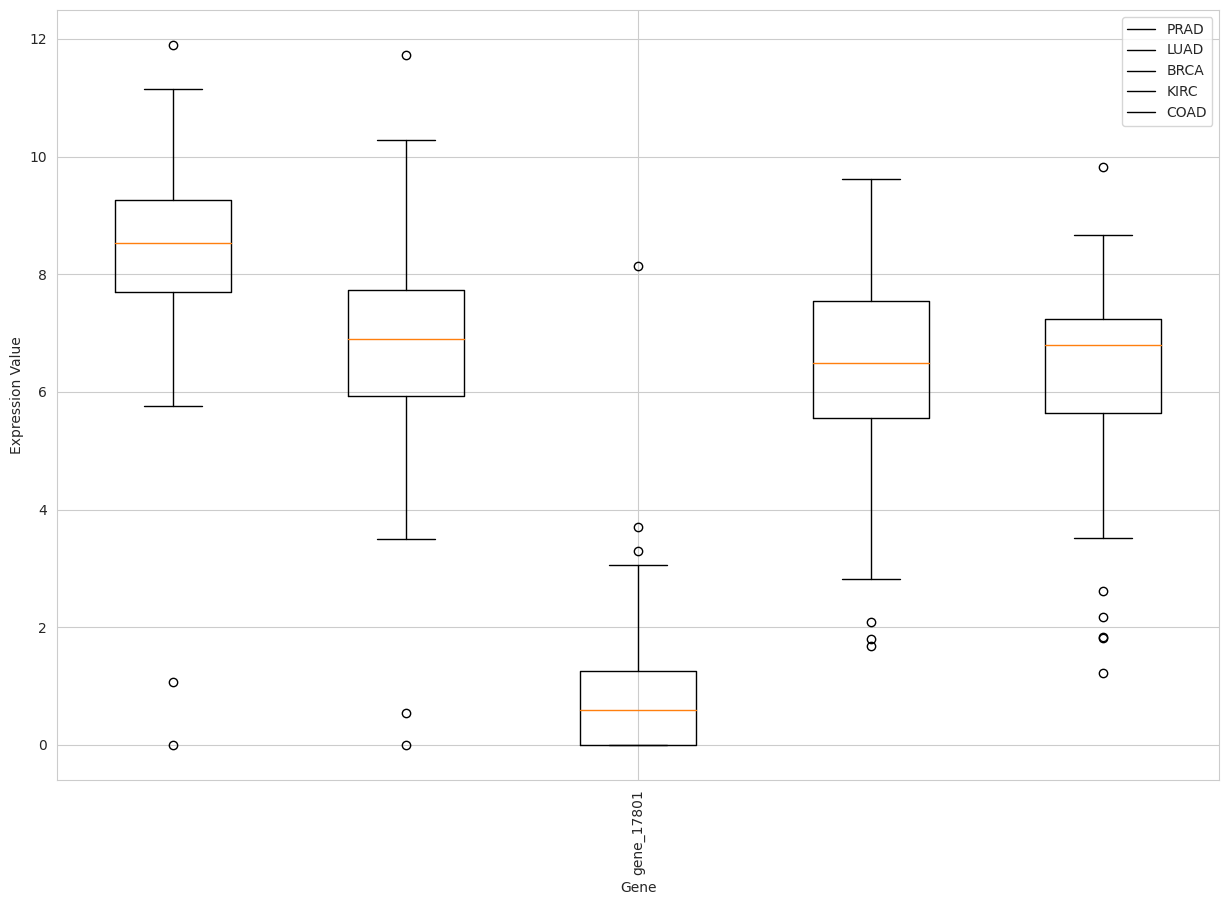

In [46]:
# Perform statistical significance testing (t-test for one vs. all and F-test)
ttest_results = {}
ftest_results = {}

classes = filtered_df['Class'].unique()

for class_label in classes:
    class_data = filtered_df[filtered_df['Class'] == class_label][selected_features_backward]
    other_data = filtered_df[filtered_df['Class'] != class_label][selected_features_backward]
    
    t_statistic, p_value = stats.ttest_ind(class_data, other_data, axis=0)
    ttest_results[class_label] = (t_statistic, p_value)
    
    ftest_results[class_label] = {}
    for gene in selected_features_backward:
        f_statistic, p_value = stats.f_oneway(class_data[gene], other_data[gene])
        ftest_results[class_label][gene] = (f_statistic, p_value)

# Print t-test results
for class_label, (t_statistic, p_value) in ttest_results.items():
    for gene, t, p in zip(selected_features_backward, t_statistic, p_value):
        if p < 0.05:
            print(f"Significant T-Test: {class_label} vs. All - Gene: {gene} - T-Statistic: {t:.6f}, P-Value: {p:.6e}")

# Print F-test results
for class_label in classes:
    for gene in selected_features_backward:
        f_statistic, p_value = ftest_results[class_label][gene]
        if p_value < 0.05:
            print(f"Significant F-Test: {class_label} vs. All - Gene: {gene} - F-Statistic: {f_statistic:.6f}, P-Value: {p_value:.6e}")

# Set the style for the plots
sns.set_style('whitegrid')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Create a box plot for each gene
for i, gene in enumerate(selected_features_backward):
    # Get the data for the current gene
    data = [filtered_df[filtered_df['Class'] == class_label][gene] for class_label in classes]
    
    # Create a box plot for the current gene
    ax.boxplot(data, positions=[i * (len(classes) + 1) + j for j in range(len(classes))], widths=0.5)
    
    # Add x-tick labels
    ax.set_xticks([i * (len(classes) + 1) + (len(classes) - 1) / 2 for i in range(len(selected_features_backward))])
    ax.set_xticklabels(selected_features_backward, rotation=90)

# Add a legend
ax.legend(classes)

# Set the axis labels
ax.set_xlabel('Gene')
ax.set_ylabel('Expression Value')

# Show the plot
plt.show()


In [47]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Create the feature matrix X and the target vector y
X = filtered_df.drop('Class', axis=1).values
y = filtered_df['Class'].values

selected_genes = filtered_df.columns.drop('Class').tolist()

# Perform feature selection using forward selection
selected_features_forward = []
best_accuracy_forward = 0.0
accuracies_forward = []

for i in range(1, len(selected_genes) + 1):
    selected_features = selected_features_forward + [gene for gene in selected_genes if gene not in selected_features_forward]
    X_selected = filtered_df[selected_features].values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Train a classification model using SVM
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train, y_train)
    accuracy = svm_model.score(X_test, y_test)
    accuracies_forward.append(accuracy)
    
    if accuracy > best_accuracy_forward:
        best_accuracy_forward = accuracy
        selected_features_forward = selected_features

# Plot the accuracy scores at each step of forward selection
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(selected_genes) + 1), accuracies_forward)
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores at Each Step of Forward Selection')
plt.show()

# Perform feature selection using backward elimination
selected_features_backward = selected_genes.copy()
best_accuracy_backward = 0.0
accuracies_backward = []

while len(selected_features_backward) > 1:
    X_selected = filtered_df[selected_features_backward].values
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Train a classification model using Random Forest
    rf_model = RandomForestClassifier(n_estimators=100)
    rf_model.fit(X_train, y_train)
    accuracy = rf_model.score(X_test, y_test)
    accuracies_backward.append(accuracy)
    
    if accuracy > best_accuracy_backward:
        best_accuracy_backward = accuracy
    else:
        selected_features_backward = selected_features_backward[:-1]

# Plot the accuracy scores at each step of backward elimination
plt.figure(figsize=(10, 5))
plt.plot(range(len(selected_genes), 0, -1), accuracies_backward[::-1])
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores at Each Step of Backward Elimination')
plt.show()


KeyboardInterrupt: ignored

Feature Selection using Stepwise Selection:

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# List of genes from stepwise selection
selected_genes_stepwise = ['gene_17801', 'gene_18745', 'gene_7623', 'gene_5622', 'gene_16987', 
                           'gene_5578', 'gene_14092', 'gene_17168', 'gene_17036', 'gene_6748', 
                           'gene_7567', 'gene_6208', 'gene_16307', 'gene_11903', 'gene_9175', 
                           'gene_14177', 'gene_18550', 'gene_4366', 'gene_1120', 'gene_15589']

X_stepwise = merged_df[selected_genes_stepwise]
y = merged_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_stepwise, y, test_size=0.2, random_state=42)

model_stepwise = LogisticRegression(solver='liblinear')
model_stepwise.fit(X_train, y_train)

predictions_stepwise = model_stepwise.predict(X_test)

print('Accuracy with stepwise selected features: ', accuracy_score(y_test, predictions_stepwise))


Accuracy with stepwise selected features:  1.0


Feature Selection using t-test/F-test:

In [52]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame and 'Class' is your target column
# You need to replace 'df' with the actual name of your DataFrame

# Top 10 genes from T-test
top10_genes_ttest = ['gene_17801', 'gene_18745', 'gene_7623', 'gene_5622', 'gene_16987', 
                     'gene_5578', 'gene_14092', 'gene_17168', 'gene_17036', 'gene_6748']

# Top 10 genes from F-test
top10_genes_ftest = ['gene_7567', 'gene_6208', 'gene_16307', 'gene_11903', 'gene_9175', 
                     'gene_14177', 'gene_18550', 'gene_4366', 'gene_1120', 'gene_15589']

# Extract the features and target
X_ttest = filtered_df[top10_genes_ttest]
X_ftest = filtered_df[top10_genes_ftest]
y = filtered_df['Class']  # Replace 'Class' with your actual target column name if it's different

# Split the data into training and testing sets for T-test genes
X_train_ttest, X_test_ttest, y_train, y_test = train_test_split(X_ttest, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets for F-test genes
X_train_ftest, X_test_ftest, _, _ = train_test_split(X_ftest, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the top 10 genes from T-test
rf.fit(X_train_ttest, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_ttest)

# Calculate the accuracy of the model
accuracy_ttest = accuracy_score(y_test, y_pred)

print('Accuracy using top 10 genes from T-test: {:.2f}'.format(accuracy_ttest))

# Train the model using the top 10 genes from F-test
rf.fit(X_train_ftest, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_ftest)

# Calculate the accuracy of the model
accuracy_ftest = accuracy_score(y_test, y_pred)

print('Accuracy using top 10 genes from F-test: {:.2f}'.format(accuracy_ftest))


Accuracy using top 10 genes from T-test: 0.96
Accuracy using top 10 genes from F-test: 0.96


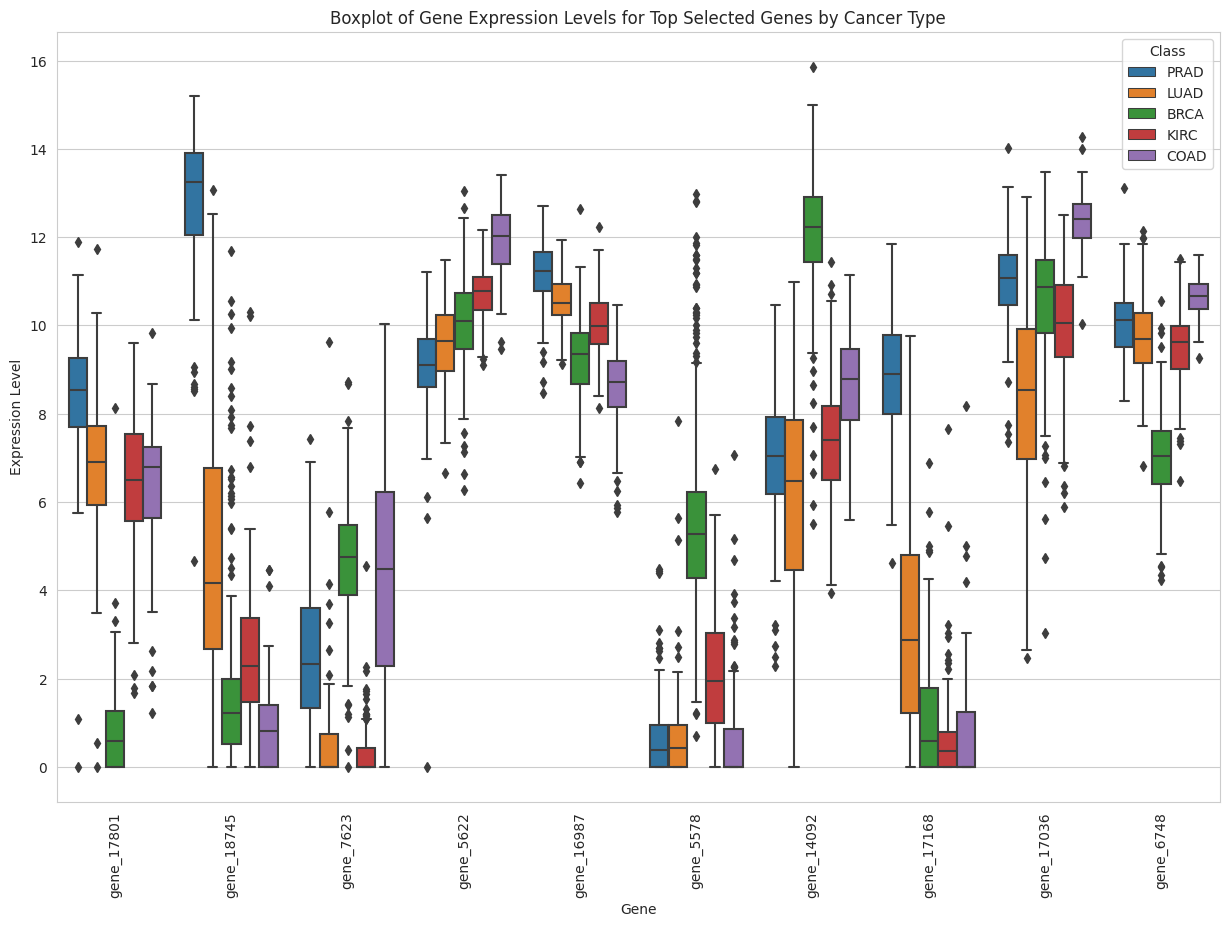

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Let's assume `merged_df` is your dataframe and 'Class' is your target variable
# And you have your top selected genes from stepwise selection, t-test, and f-test in 'top_selected_genes' list

top_selected_genes = ['gene_17801', 'gene_18745', 'gene_7623', 'gene_5622', 'gene_16987', 'gene_5578', 'gene_14092', 'gene_17168', 'gene_17036', 'gene_6748'] 

# Melt the dataframe to make it suitable for seaborn boxplot
melted_df = pd.melt(merged_df, id_vars='Class', value_vars=top_selected_genes)

# Create the boxplot
plt.figure(figsize=(15,10))
sns.boxplot(x='variable', y='value', hue='Class', data=melted_df)
plt.title('Boxplot of Gene Expression Levels for Top Selected Genes by Cancer Type')
plt.xlabel('Gene')
plt.ylabel('Expression Level')
plt.xticks(rotation=90)
plt.show()


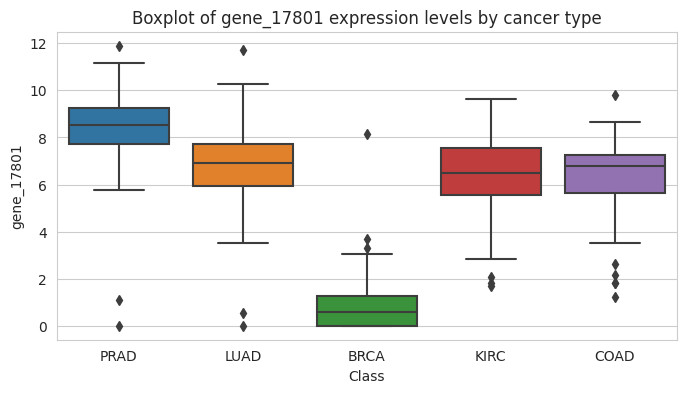

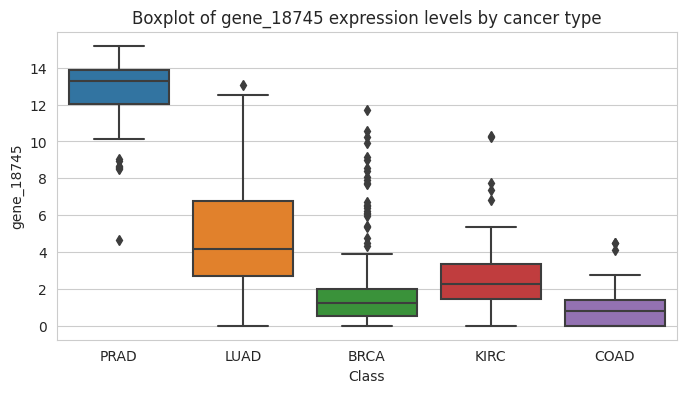

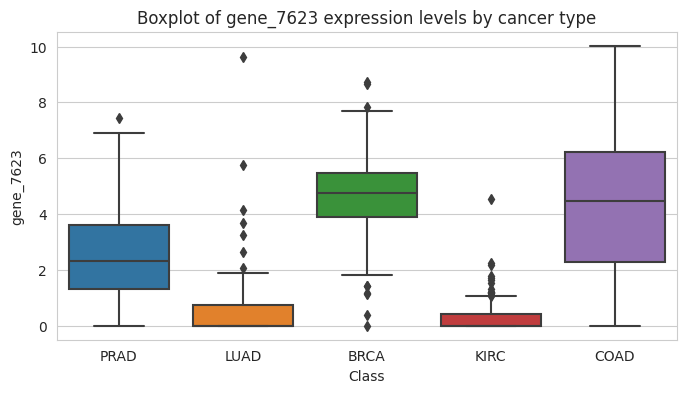

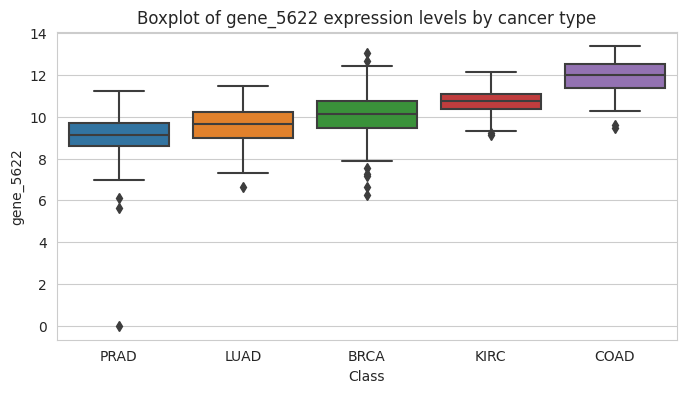

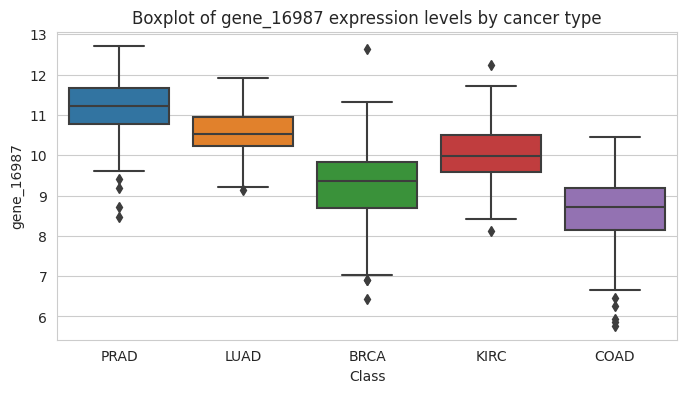

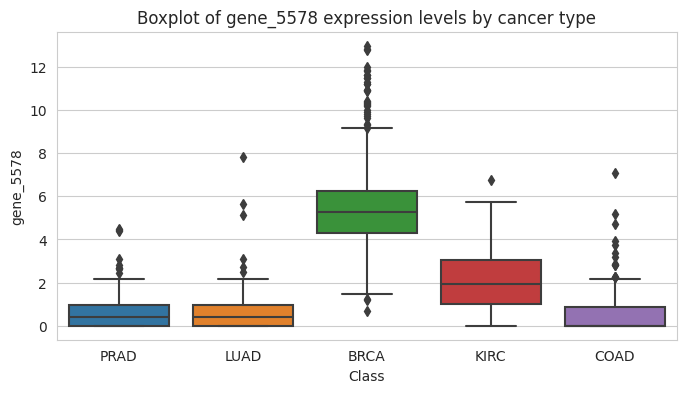

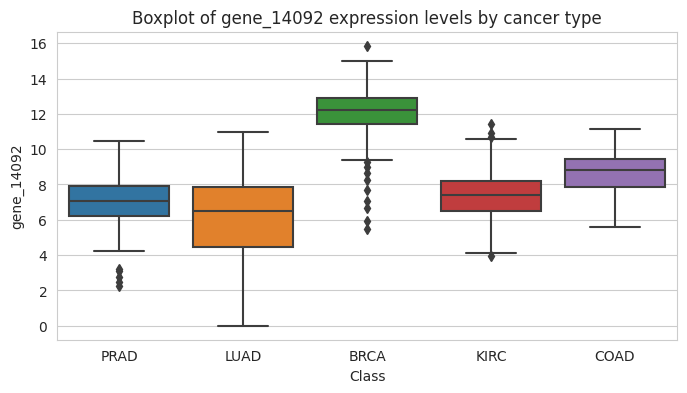

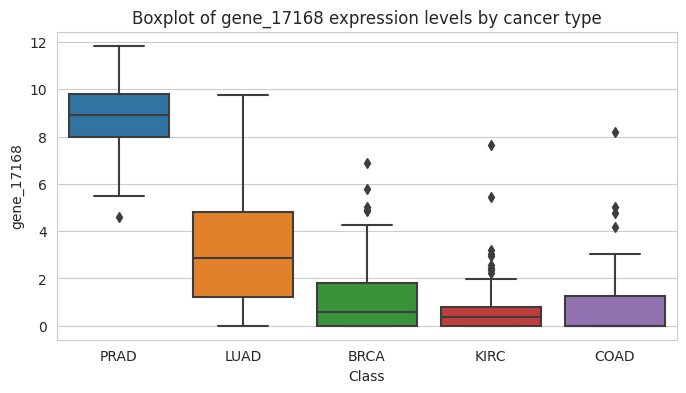

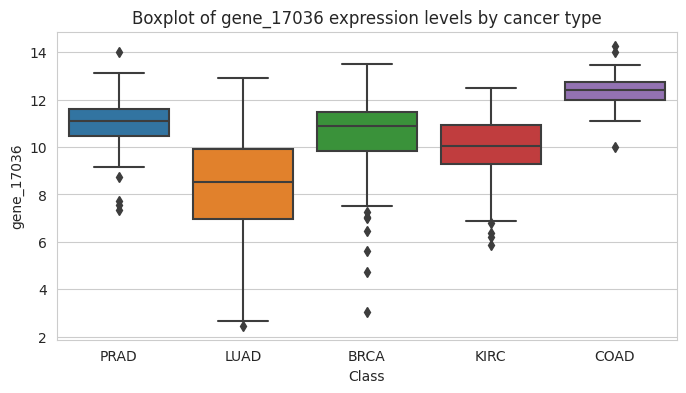

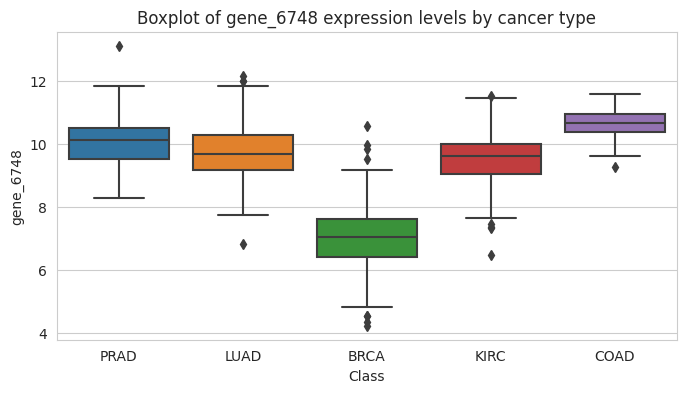

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of top genes from the feature selection
selected_genes = ['gene_17801', 'gene_18745', 'gene_7623', 'gene_5622', 'gene_16987', 'gene_5578', 'gene_14092',
                  'gene_17168', 'gene_17036', 'gene_6748']

for gene in selected_genes:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=gene, data=merged_df)
    plt.title(f'Boxplot of {gene} expression levels by cancer type')
    plt.show()
